# jieba module

In [ ]:
import jieba

# set word data
jieba.set_dictionary("dict.txt")
# add personal word data
jieba.load_userdict("user_dict.txt")
# add stop word
with open("stop_word.txt", "r", encoding = "utf-8-sig") as f:
  stops = f.read().spilt("\n")

sentence = "我今天要到松山機場出國"

breakword = jieba.cut(sentence, cut_all = False)
words = []
for word in breakword:
  if word not in stops:
    words.append(word)
print("精準模式: ", "|".join(breakword))

breakword = jieba.cut(sentence, cut_all = True)
words = []
for word in breakword:
  if word not in stops:
    words.append(word)
print("全文模式: ", "|".join(breakword))

breakword = jieba.cut_for_search(sentence)
words = []
for word in breakword:
  if word not in stops:
    words.append(word)
print("搜尋引擎模式: ", "|".join(breakword))

# WordCloud

Building prefix dict from /content/dict.txt ...
Loading model from cache /tmp/jieba.ueb620ec8402181953a0299d7957c0d6e.cache
Loading model cost 0.688 seconds.
Prefix dict has been built successfully.


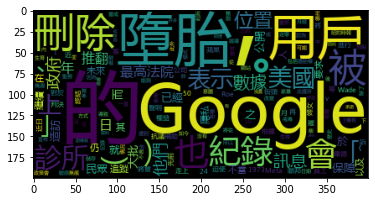

In [17]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter
from PIL import ImageFont

# load the text file
text = open("news.txt", "r", encoding = "utf-8").read()

# set word data
jieba.set_dictionary("dict.txt")
# set stop words
with open("stopword.txt", "r", encoding = "utf-8-sig") as f:
  stops = f.read().spilt("\n")

# add words into list through jieba
terms = []
for t in jieba.cut(text, cut_all = False):
  if t not in stops:
    terms.append(t)

# make the word list into dictionary with times
diction = Counter(terms)

# set wordcloud's font, color, and shape
font = "MSYH.TTC"
mask = np.array(Image.open("heart.png"))
wordcloud = WordCloud(font_path = font)
wordcloud = WordCloud(background_color = "white", mask = mask, font_path = font)
wordcloud.generate_from_frequencies(frequencies = diction)

# display the result
plt.figure(figsize = (6, 6))
plt.imshow(wordcloud)